<a href="https://colab.research.google.com/github/avadhutc/Session4/blob/master/code/EVA_Session_4_Fourth_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change No: 1,  Reduce Lr on Plateau by factor = 0.1

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras # install keras package
import keras # import keras package for use

In [0]:
import numpy as np # import numpy package alias np

from keras.models import Sequential # import Sequential flow to build model
from keras.layers import Flatten # import flatten layer to convert any dimensional layer into one di
from keras.layers import Convolution2D, MaxPooling2D # for doing convolution and maxpooling on image 
from keras.utils import np_utils # utility functions

from keras.datasets import mnist# import mnist dataset

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()# download mnist dataset and load for training and testing sets

(60000, 28, 28)


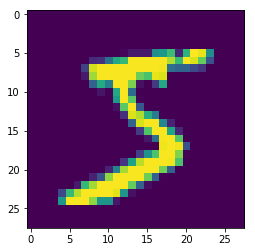

In [0]:
print (X_train.shape) # print shape of X_train dataset
from matplotlib import pyplot as plt # import pyplot alias plt for plotting 
#%matplotlib inline # print results in notebook cells
plt.imshow(X_train[0]) # display image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # reshape or arrange train dataset for all images with 1 channel 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)# reshape or arrange test dataset for all images with 1 channel

In [0]:
X_train = X_train.astype('float32') # set datatype of training dataset as float32
X_test = X_test.astype('float32')# set datatype of test dataset as float32
X_train /= 255 # normalize training dataset between 0 and 1
X_test /= 255 # normalize tes dataset between 0 and 1

In [0]:
y_train[:10] # training set labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)# convert train labels into one-hot encodings
Y_test = np_utils.to_categorical(y_test, 10)# convert test labels into one-hot encodings

In [0]:
Y_train[:10]# print first 10 train labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12

model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 11 + 8 + 8 = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 64)        5824      
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
# import adam optimizer parameters
from keras.optimizers import Adam

In [0]:
# set adam optimizer parameters
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [0]:
callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True),
    ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1,factor=0.1, min_lr=0.00001 )
]

In [0]:
# model compilation
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=50,validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 265us/step - loss: 0.1389 - acc: 0.9577 - val_loss: 0.0468 - val_acc: 0.9835

Epoch 00001: val_acc improved from -inf to 0.98350, saving model to best_mnist_cnn_model.h5
Epoch 2/50
60000/60000 [==============================] - 13s 222us/step - loss: 0.0475 - acc: 0.9847 - val_loss: 0.0392 - val_acc: 0.9873

Epoch 00002: val_acc improved from 0.98350 to 0.98730, saving model to best_mnist_cnn_model.h5
Epoch 3/50
60000/60000 [==============================] - 13s 222us/step - loss: 0.0370 - acc: 0.9880 - val_loss: 0.0357 - val_acc: 0.9884

Epoch 00003: val_acc improved from 0.98730 to 0.98840, saving model to best_mnist_cnn_model.h5
Epoch 4/50
60000/60000 [==============================] - 13s 222us/step - loss: 0.0306 - acc: 0.9902 - val_loss: 0.0295 - val_acc: 0.9899

Epoch 00004: val_acc improved from 0.98840 to 0.98990, saving model to best_mnist_cnn_model.h5
Epoch 5/50
60

# Visualization

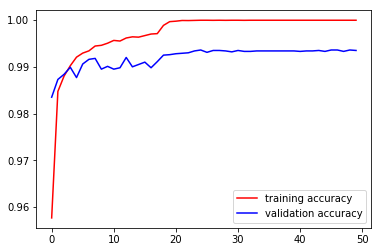

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

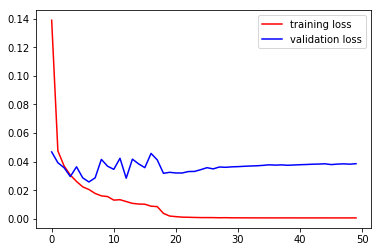

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.038530932814849005, 0.9935]


# Maximum Validation Accuracy achieved 99.36% @ 25th epoch with 14.5 K parameters
# But Overfitting problem

# Change No: 2
## To avoid overiftting-
### 1. Use dropout(0.2) after Batchnormalization( 3 places)
### 2. Lr begin changed from of 0.001 to 0.003 
### 3. Batch size changed  from of 32 to 128

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12

model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 11 + 8 + 8 = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_35 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
# import adam optimizer parameters
from keras.optimizers import Adam

In [0]:
# set adam optimizer parameters
adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [0]:
callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True),
    ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1,factor=0.1, min_lr=0.00001 )
]

In [0]:
# model compilation
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=50,validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1906 - acc: 0.9408 - val_loss: 0.0572 - val_acc: 0.9807

Epoch 00001: val_acc improved from -inf to 0.98070, saving model to best_mnist_cnn_model.h5
Epoch 2/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.0628 - acc: 0.9801 - val_loss: 0.0479 - val_acc: 0.9842

Epoch 00002: val_acc improved from 0.98070 to 0.98420, saving model to best_mnist_cnn_model.h5
Epoch 3/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0411 - val_acc: 0.9877

Epoch 00003: val_acc improved from 0.98420 to 0.98770, saving model to best_mnist_cnn_model.h5
Epoch 4/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0411 - acc: 0.9876 - val_loss: 0.0397 - val_acc: 0.9868

Epoch 00004: val_acc did not improve from 0.98770
Epoch 5/50
60000/60000 [==============================] - 6s 93us

# Visualization

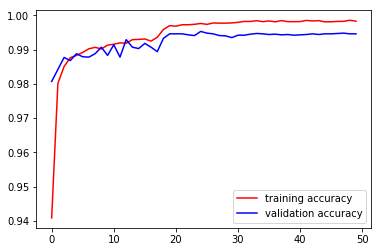

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

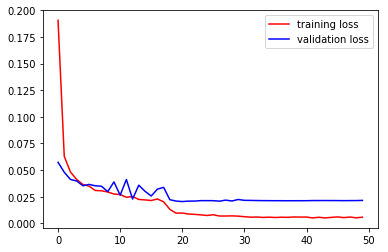

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.021424594816968057, 0.9946]


# Maximum Validation Accuracy achieved 99.53% @ 25th epoch with 14.5K parameters